<a href="https://colab.research.google.com/github/plumwiserim/Data-Analysis/blob/main/Class9_ML_%E1%84%8B%E1%85%A1%E1%86%BC%E1%84%89%E1%85%A1%E1%86%BC%E1%84%87%E1%85%B3%E1%86%AF%E1%84%80%E1%85%B5%E1%84%87%E1%85%A5%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 실습
## 앙상블 기법 : VotingClassifier


In [ ]:
#필요한 라이브러리 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 데이터셋 다운로드
cancer = load_breast_cancer()

# 데이터셋 분할
x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size=0.3,
                                                    random_state=12)

In [ ]:
# LogisticRegression 및 DecisionTreeClassifier 객체 생성
lr = LogisticRegression(random_state=12, max_iter=5000)
dt = DecisionTreeClassifier(random_state=12)

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=8)

### sklearn.ensemble 의 VoringClassifier 사용

VoringClassifier 클래스 객체 생성시 주요 인자
- estimators : 측정에 사용할 알고리즘 객체 리스트
- voting : 적용할 보팅의 방식{ ‘hard’, ‘soft’}, default=’hard’

VoringClassifier API의 Method
- fit(X, y) : 학습 데이터를 이용하여 Decision Tree 모델을 학습
- predict(X) : 모델에 테스트 데이터를 입력하여 계산된 예측값 반환
- score(X, y) : 모델에 테스트 데이터를 입력하여 모델의 성능지표(정확도) 반환


In [ ]:
# VotingClassifier 객체 생성
voting = VotingClassifier(estimators=[('LR',lr), ('DT',dt), ('KNN', knn_clf)], 
                          voting='soft')

# VotingClassifier 학습 
voting.fit(x_train , y_train)

# 학습된 모델 기반 예측 수행
pred = voting.predict(x_test)

# accuracy_score 호출하여 accuracy 계산 후 출력
print('Accuracy: {0:.3f}'.format(accuracy_score(y_test , pred)))

Accuracy: 0.930


In [ ]:
classifiers = [lr, dt, knn_clf]

for classifier in classifiers :
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    
    print('{0} Accuracy:{1:.4f}'. format(class_name, accuracy_score(y_test, pred)))

LogisticRegression Accuracy:0.9181
DecisionTreeClassifier Accuracy:0.9123
KNeighborsClassifier Accuracy:0.9123


## 앙상블 기법 :  Bagging 을 위한 Random Forest

### sklearn.ensemble 의 RandomForestClassifier 사용

RandomForestClassifier 클래스 사용
- 대부분의 Hyperparameter는 Decision Tree와 유사
- max_depth, max_leaf_nodes, max_features, …

n_estimators: 생성되는 Decision Tree의 개수
- Default 값은 100: 100개의 Decision Tree 학습 및 예측 Voting
- 많이 생성한다고 무한대로 예측 성능이 좋아 지지는 않음

In [ ]:
# RandomForestClassifier 임포트
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 객체 생성
rf = RandomForestClassifier(random_state=12)

# RandomForestClassifier 객체 학습 및 검증
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

print('Accuracy: {0:.3f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.924


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],
          'max_depth':[6, 8, 10, 12],
          'min_samples_leaf':[8, 12, 18 ],
          'min_samples_split':[8, 16, 20]}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('Optimal Hyper Parameter') 
print(grid_cv.best_params_)
print('Max Accuracy: {0:.4f}'.format(grid_cv.best_score_)) 

Optimal Hyper Parameter
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
Max Accuracy: 0.9447


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300,
                                 max_depth=6,
                                 min_samples_leaf=8,
                                 min_samples_split=8,
                                 random_state=0)

rf_clf1.fit(x_train , y_train)
pred = rf_clf1.predict(x_test) 

print('Accuracy: {0:.4f}'.format(accuracy_score(y_test , pred))) 


Accuracy: 0.9123


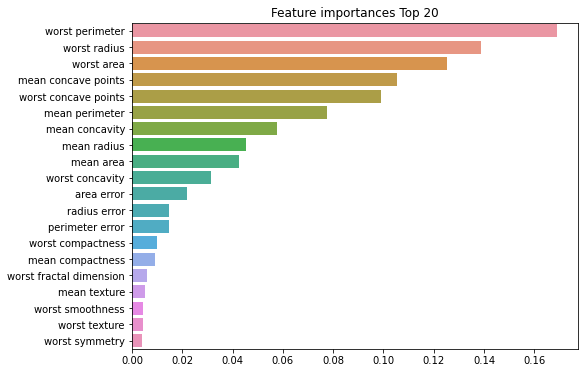

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,
                            index=cancer.feature_names)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show() 